---

# US015 - DOCUMENTATION

# US015 
As a Player, I want to perform a statistical analysis of the average annual profit of a user-specified railway station. In order to achieve this, a table with key descriptive measures: mean, standard deviation, median, and mode will be generated. Additionally, the analysis aims to identify outlier profits as well as to determine the most and least profitable years.

## Objective
This user story allows to verify a specified station. This will output some relevant data to that station such has: Mean; Standard Deviation; Median. Taken this into account we will check what was the most and least profitable year.

##

## Theorical Concepts:

### Data processment
The `.csv` is read and comprehended via *Pandas*. We then, make sure every value is a float, changing the `,` to `.`. Here we make sure we calculate the `profits` to use it to future analysis (Identify the most and least profitable year). 

#### Profits

$\text{Profits} = \text{Revenues} - \text{Expenses}$


### Choose station
All stations are listed via a simple loop. After that the user is able to choose which one will be analysed.

### Data analyze and print
Using *Pandas* integrated *NumPy* we make sure we calculate the required values: `Mean`; `Standard deviation`; `Median`; `Mode`.

### Mean 
The mean is the sum of all values divided by the number of values. It represents the central tendency of a dataset.

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

$$
\bar{x}: \text{Mean} \\

n: \text{Number of data points} \\

x_i: \text{Individual data points}
$$


### Standard Deviation
**Standard deviation** measures the amount of variation or dispersion of a set of values. A *low* **standard deviation** means the values are close to the mean, and a *high* **standard deviation** means the values are spread out.

$$
\sigma = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 }
$$

$$
\sigma: \text{Standard Deviation} \\
x_i: \text{Individual data points} \\
\bar{x}: \text{Mean} \\
n: \text{Number of data points}
$$

### Variance
**Variance** is the square of the standard deviation and gives a measure of how far each data point is from the mean.

$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

$$
\sigma^2: \text{Variance} \\
x_i: \text{Individual data points} \\
\bar{x}: \text{Mean} \\
n: \text{Number of data points}
$$

### Median
The **median** is the middle value when the data points are ordered from smallest to largest. If there is an even number of data points, it is the average of the two middle values.

$$
\text{Median} = \left\{
\begin{array}{ll}
\frac{x_{n/2} + x_{n/2+1}}{2}, & \text{if n is even} \\
x_{(n+1)/2}, & \text{if n is odd}
\end{array}
\right.
$$

$$
x_n: \text{Ordered data points}
$$

### Mode
The **mode** is the value that occurs most frequently in the dataset. It is represented as the value that has the highest frequency.

$$
\text{Mode} = \arg\max_{x_i} \, \text{Frequency}(x_i)
$$

$$
\text{Frequency}(x_i): \text{Frequency of a given value } x_i \\
\arg\max: \text{The value that maximizes the frequency}
$$

### IQR (InterQuartile Range)
The `Interquartile Range (IQR)` is a measure of statistical dispersion, or in simple terms, it gives us an idea of how spread out the middle 50% of the data is.

Arrange the data in increasing order.

Example dataset:
2,4,5,7,8,12,15,18,22,252,4,5,7,8,12,15,18,22,25

Find **Q1** (the 25th percentile):
**Q1** is the median of the lower half of the dataset. If the dataset has an odd number of values, we exclude the median in the lower half.

For this example, the lower half of the data is:
2,4,5,7,82,4,5,7,8

The median of this subset is 55, so **Q1** = 5.

Find **Q3** (the 75th percentile):
**Q3** is the median of the upper half of the dataset.

For this example, the upper half of the data is:
15,18,22,2515,18,22,25

The median of this subset is the average of 1818 and 2222, which is: 20

Calculate the IQR:
Now that we have both **Q1** and **Q3**, we can calculate the IQR: 15

- A smaller IQR indicates that the data points are closer to the median, meaning there's less variation within the central portion of the data.

- A larger IQR indicates that the data points are more spread out, meaning there's more variation in the central portion of the data.

$$
IQR = Q_3 - Q_1 \\

Q_1: \text{First quartile (25th percentile)} \\
Q_3: \text{Third quartile (75th percentile)} 

$$

#### IQR Outliers

Outliers are values that fall significantly outside the typical range of the data.

We often define outliers as those points that are lower than Q1 - 1.5 × IQR or greater than Q3 + 1.5 × IQR.

$$
\text{Lower Bound} = Q_1 - 1.5 \times IQR \\
\text{Upper Bound} = Q_3 + 1.5 \times IQR
$$

NOTE: The factor 1.5 is arbitrary, lowering this value the outliers will be more common because the threshold is shorter and the inverse happens the other way, if we increase this factor's value

### Argmax
Looks for the highest profitable year

$$
\text{Most Profitable Year} = \arg\max_{i} (\text{Profit}_i)
$$

### Least profitable year
Looks for the lowest profitable year
$$
\text{Profit}_i: \text{Profit for year } i \\
\arg\max: \text{The index (or year) where the profit is maximized}
$$


---

# US015 - IMPLEMENTATION

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

def load_us15_data():
    try:
        data = pd.read_csv("../data/Stations_Data.csv", sep=";")
        
        # Convert decimal commas to dots and ensure numeric columns
        for col in ["Year", "Revenues", "Expenses"]:
            if data[col].dtype == 'object':
                data[col] = data[col].str.replace(',', '.').astype(float)
        
        data["Profit"] = data["Revenues"] - data["Expenses"]  # Fixed typo ("Expenses")
        return data
    
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def choose_station(data):
    """Let user pick from available stations (no 'All' option)"""
    if data is None:
        return None
        
    stations = sorted(data["Station"].unique())
    
    print("\nAvailable Individual Stations:")
    for i, station in enumerate(stations, 1):
        print(f"{i}. {station}")
    
    while True:
        choice = input("\nEnter station number: ")
        if choice.isdigit() and 0 < int(choice) <= len(stations):
            return stations[int(choice)-1]
        print(f"Invalid! Enter 1-{len(stations)}")

def kde_mode(data):
    """Calculate mode using Kernel Density Estimation (like friend's code)"""
    kde = stats.gaussian_kde(data)
    x_vals = np.linspace(min(data), max(data), 1000)
    kde_vals = kde(x_vals)
    return x_vals[np.argmax(kde_vals)]

def analyze_station_profit(station_name, data):
    # Aggregate yearly profits (critical fix: sum duplicates if they exist)
    annual_data = data[data["Station"] == station_name].groupby("Year")["Profit"].sum().reset_index()
    
    if annual_data.empty:
        print(f"No data found for station '{station_name}'.")
        return None

    profits = annual_data["Profit"]
    
    # Calculate statistics
    mean = profits.mean()
    std_dev = profits.std()
    median = profits.median()
    mode = kde_mode(profits)  # Using KDE instead of pandas mode()

    # Find most/least profitable years (fixed to work with aggregated data)
    most_profitable_year = annual_data.loc[profits.idxmax(), "Year"]
    least_profitable_year = annual_data.loc[profits.idxmin(), "Year"]

    # Outlier detection (your original IQR method)
    answer = input("Do you want to use the standard factor, 1.5? (Y/N)\n").upper()
    factor = 1.5 if answer == "Y" else float(input("Indicate another value: "))
    
    Q1 = profits.quantile(0.25)
    Q3 = profits.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = annual_data[(profits < lower_bound) | (profits > upper_bound)]

    # Print results
    print(f"\nStatistical Analysis for Station: {station_name}")
    print(f"Mean Profit: {mean:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Median Profit: {median:.2f}")
    print(f"Mode Profit: {mode:.2f}")
    print(f"Most Profitable Year: {int(most_profitable_year)}")
    print(f"Least Profitable Year: {int(least_profitable_year)}")
    
    if not outliers.empty:
        print("\nOutlier Profits:")
        print(outliers[["Year", "Profit"]])
    else:
        print("\nNo outliers detected.")

    return {
        "station": station_name,
        "mean": mean,
        "std_dev": std_dev,
        "median": median,
        "mode": mode,
        "most_profitable_year": most_profitable_year,
        "least_profitable_year": least_profitable_year,
        "outliers": outliers
    }

# Main execution
data = load_us15_data()
if data is not None:
    station = choose_station(data)
    if station:
        analysis_results = analyze_station_profit(station, data)

---

# US016 - DOCUMENTATION

# US016 
US16 - As a Player, I want to perform a comparative analysis of passenger arrivals across all stations. To achieve this, a boxplot will be created for each station, displaying the number of arriving passengers using all recorded data. This visualization will facilitate the identification of trends, variations, and anomalies in passenger traffic across
different stations.


## Objective
This user story aims to perform a comparative analysis of passenger arrivals at all stations.To this analysis be possible it will be created a boxplot for each station. The data in use will be the csv data filtering the data intended for analysis (passengers and stations).

## Theorical Concepts:

### Boxplot 
The boxplot is a graphical representation of the values: minimum, q1, median, q3, maximum.

- The extremes of the box are the first and third quartiles, that is, the length of the box and the interquartile range;
- The median is marked as a line in the box;
- Whiskers- two lines extend to the minimum and maximum values;
- Outliers, which can be defined as values ​​that are more than 1.5 times the interquartile range away from the median, are represented separately.

### Quartile
Definition: Are values ​​that divide a set of ordered data into four equal parts. In other words, they help to understand how the data is distributed, separating it into four groups with the same amount of data in each group.

In the context of boxplots:
- The first quartile (Q1) and third quartile (Q3) delimit the interquartile range (IQR), which is the range where most of the data is concentrated.
- The second quartile (Q2), or median, is the central dividing point of the data, and it shows where the "center" of the distribution is.

They are useful for identifying dispersion (how spread out the data is) and skewness (whether the data is more concentrated in one part of the chart or not).

### Median
In a boxplot, the median has an important visual representation:

- Median Position: The line that cuts through the boxplot box indicates the median. It is in the middle of the box, between the first quartile (Q1) and the third quartile (Q3). The median divides the data set into two halves:
    - 50% of the data is below the median.
    - 50% of the data is above the median.

- Interpretation of the Median: The median gives an idea about the central tendency of the data, that is, where the values ​​are concentrated. In a symmetrical data set, the median will be in the center of the box. If the data is skewed, the median may not be in the center of the box, indicating that the distribution of the data is skewed to one side.


### Whiskers
Whiskers (Vertical Lines): 
- The whiskers extend outside the box and indicate the range of values ​​within a certain limit, usually 1.5 times the IQR (Interquartile Range) from the first (Q1) and third (Q3) quartiles. This covers most of the data that is "normal" or within the expected range. 
- End of Whiskers: The line at the end of each whisker represents the largest value within the acceptable range (from Q1 or Q3, up to 1.5 times the IQR). 
- If there are any values ​​outside this range, they are considered outliers and are represented as an individual point.


#### IQR Outliers

Outliers are values that fall significantly outside the typical range of the data.
We often define outliers as those points that are lower than Q1 - 1.5 × IQR or greater than Q3 + 1.5 × IQR.

$$
\text{Lower Bound} = Q_1 - 1.5 \times IQR \\
\text{Upper Bound} = Q_3 + 1.5 \times IQR
$$



## Obtained results:



Comparative analysis beteween stations using the data from csv:

- There is greater variation in passenger numbers at Hamburg station, as the interquartile range (IQR), which represents the difference between the first quartile (Q1) and the third quartile (Q3), is larger than at other stations.On the other hand, the station that has the smallest variation in passengers is Hannover station.

- Hamburg station has outliers with the highest values, this means that, at certain times, the station had a much higher number of passengers than normal, and this variation was, compared to the other stations, the largest.On the other hand, Berlin station does not have any outliner visible which means that it has less significant fluctuations in the number of passengers, which makes it more stable

- The median for Hamburg station is significantly higher than for the other stations, which indicates that, on average, Hamburg receives more passengers than the other stations.
Hannover station has the lowest median, suggesting that it typically receives far fewer passengers compared to other stations.

In general, the use of boxplots (in the coxtext of PI) helps:
- Compare the distribution of passenger numbers between stations.
- Identify patterns and trends in passenger arrivals at each station (which station has the most or least flow, which is the most volatile).
- Detect peaks and significant variations (outliers), so that informed decisions can be made, such as planning more resources or strategies to deal with these peaks.
- Assess the consistency of passenger traffic at stations, helping to understand whether the behavior is stable or if it varies considerably



---

# US016 - IMPLEMENTATION

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Stations_Data.csv", sep=";")


colunas_numericas = ['Iron', 'Coal', 'Steel', 'Vegetables', 'Cereals', 'Wool',
                     'Coffee', 'Cattle', 'Passengers', 'Mail', 'Revenues', 'Expenses']

for coluna in colunas_numericas:
    df[coluna] = df[coluna].astype(str).str.replace(',', '.').astype(float)


plt.figure(figsize=(12, 6))
sns.boxplot(x='Station', y='Passengers', data=df, palette='Set3')
plt.title('Distribuition of passengers per station(Boxplot)', fontsize=14)
plt.xlabel('Station')
plt.ylabel('Number of passengers(Arrivals)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---

# US017 - DOCUMENTATION

#  US017 

As a Player, I want to perform an analysis of the cargo arriving at each station using all recorded data. Given the station’s name and cargo type specified by the user, a histogram will be created to visually represent the distribution of analyzed information, providing insights into cargo patterns.

## Objective

This user story, makes sure you can analyse the cargo arriving at each station. This analysis will be done by showing a histogram that represents the cargo, to provide insights on that cargo patterns, this histogram will have a name and label of a cargo type.

## Theoretical Concepts:
### Data processment
The `.csv` is read and comprehended via *Pandas*. We then, make sure every value is a float, changing the `,` to `.`. 


### Choose station
All stations are listed via a simple loop. After that the user is able to choose which one will be analysed.

<small> You are able to choose just one or all of the stations </small>

### Choose cargo type
All cargo types are listed via a simple loop. After that the user is able to choose which one will be analysed.

<small> You are able to choose just one or all of the cargo types </small>

### Histogram creation

The formula for the frequency of a bin in a histogram is as follows:

$$
f(b_j) = \sum_{i=1}^{n} \mathbf{1}_{[b_{j-1}, b_j)}(x_i)
$$
- **Frequency of a bin**:  
  $f(b_j)$ is the frequency of bin $j$, i.e., the number of data points in bin $b_j$.

- **Total data points**:  
  $n$ is the total number of data points in the dataset.

- **Data point notation**:  
  $x_i$ represents the $i$-th data point in the dataset.

- **Bin limits**:  
  - **Upper limit**: $b_j$ (for the $j$-th bin)  
  - **Lower limit**: $b_{j-1}$ (for the $j$-th bin)

- **Indicator function**:  
  $\mathbb{1}_{[b_{j-1}, b_j)}(x_i)$ returns **1** if $x_i$ lies in $[b_{j-1}, b_j)$, and **0** otherwise.

#### How it work in code?

`plt.hist(filteredData[cargo], bins=5, edgecolor='black', color='steelblue')`

*filteredData[cargo]*: The values for the selected cargo and station.

*bins=5*: The data is divided into 5 bins (ranges of values).

*edgecolor* and *color*: Style options for clarity.

#### What You Learn From the Histogram

- Skewness: Is the cargo distribution lopsided?
- Spread: Are values clustered or spread across bins?
- Outliers: Are there extreme highs/lows?
- Station Comparison: How distributions differ between stations or cargo types.


#### Summary of logic

| Cargo Type     | Station Scope | What Happens                                               |
| -------------- | ------------- | ---------------------------------------------------------- |
| All Products   | All Stations  | Plot each cargo type for each station.                     |
| All Products   | One Station   | Plot each cargo type at the selected station.              |
| One Cargo Type | All Stations  | Plot that cargo type for each station.                     |
| One Cargo Type | One Station   | Plot just one histogram — for that cargo and that station. |







---

# US017 - IMPLEMENTATION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def load_us17_data():
    csvLoaded = pd.read_csv(
        "../data/Stations_Data.csv",
        sep=";"
    )

    columnsToConvert = ["Iron", "Coal", "Steel", "Vegetables", "Cereals", "Wool", "Coffee", "Cattle"]

    for column in columnsToConvert:
        if csvLoaded[column].dtype == 'object':
            csvLoaded[column] = csvLoaded[column].str.replace(',', '.', regex=False).astype(float)

    return csvLoaded, columnsToConvert

dataFrame, columnsToConvert = load_us17_data()


In [ ]:
def choose_station(csvLoaded):
    stations = csvLoaded["Station"].unique()
    print("Available Stations:", flush=True)
    for station in stations:
        print(f"- {station}", flush=True)

    print("- All Stations", flush=True)

    chosen = input("\nEnter the name of the station you want to analyze (or 'All Stations' for all): ")

    while chosen not in stations and chosen != "All Stations":
        print("Invalid station name. Please choose from the list above.", flush=True)
        chosen = input("Enter the station name again (or 'All Stations' for all): ")

    return chosen


In [ ]:
def choose_cargo_type(columnsToConvert):
    print("Available Cargo Types:", flush=True)
    for cargo in columnsToConvert:
        print(f"- {cargo}", flush=True)

    print("- All Products", flush=True)

    chosen = input("\nEnter the cargo type you want to analyze (or 'All Products' for all): ")

    while chosen not in columnsToConvert and chosen != "All Products":
        print("Invalid cargo type. Please choose from the list above.", flush=True)
        chosen = input("Enter the cargo type again (or 'All Products' for all): ")

    return chosen


In [ ]:
def plot_histogram(dataFrame, columnsToConvert, stationName, cargoType):
    if cargoType == "All Products":
        if stationName == "All Stations":
            stations = dataFrame["Station"].unique()
            for station in stations:
                for cargo in columnsToConvert:
                    filteredData = dataFrame[dataFrame['Station'] == station]
                    if filteredData.empty:
                        continue
                    plt.figure(figsize=(8, 5))
                    plt.hist(filteredData[cargo], bins=5, edgecolor='black', color='steelblue')
                    plt.title(f'{cargo} Distribution at {station}', fontsize=14)
                    plt.xlabel(f'{cargo} Amount')
                    plt.ylabel('Frequency')
                    plt.grid(True, linestyle='--', alpha=0.5)
                    plt.tight_layout()
                    plt.show()
        else:
            for cargo in columnsToConvert:
                filteredData = dataFrame[dataFrame['Station'] == stationName]
                if filteredData.empty:
                    continue
                plt.figure(figsize=(8, 5))
                plt.hist(filteredData[cargo], bins=5, edgecolor='black', color='steelblue')
                plt.title(f'{cargo} Distribution at {stationName}', fontsize=14)
                plt.xlabel(f'{cargo} Amount')
                plt.ylabel('Frequency')
                plt.grid(True, linestyle='--', alpha=0.5)
                plt.tight_layout()
                plt.show()
    else:
        if stationName == "All Stations":
            stations = dataFrame["Station"].unique()
            for station in stations:
                filteredData = dataFrame[dataFrame['Station'] == station]
                if filteredData.empty:
                    continue
                plt.figure(figsize=(8, 5))
                plt.hist(filteredData[cargoType], bins=5, edgecolor='black', color='steelblue')
                plt.title(f'{cargoType} Distribution at {station}', fontsize=14)
                plt.xlabel(f'{cargoType} Amount')
                plt.ylabel('Frequency')
                plt.grid(True, linestyle='--', alpha=0.5)
                plt.tight_layout()
                plt.show()
        else:
            filteredData = dataFrame[dataFrame['Station'] == stationName]
            if filteredData.empty:
                print(f"No data available for station '{stationName}'.")
                return
            plt.figure(figsize=(8, 5))
            plt.hist(filteredData[cargoType], bins=5, edgecolor='black', color='steelblue')
            plt.title(f'{cargoType} Distribution at {stationName}', fontsize=14)
            plt.xlabel(f'{cargoType} Amount')
            plt.ylabel('Frequency')
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.tight_layout()
            plt.show()


In [ ]:
dataFrame, columnsToConvert = load_us17_data()

In [ ]:
stationName = choose_station(dataFrame)

In [ ]:
cargoType = choose_cargo_type(columnsToConvert)

In [ ]:
plot_histogram(dataFrame, columnsToConvert, stationName, cargoType)

---

# US018 - DOCUMENTATION

#  US018

As a Player, I want to perform the analysis of train distribution, passengers, and mail across different stations. Using all recorded data, this distribution will be visually represented through three pie charts, providing a clear and comprehensive overview of how these elements are allocated among the stations

## Objectives

This user story allows the player to verify the distribution of **passengers**; **trains arrivals**; **mail transported** throught different stations. This will be visually available via three pie charts.

## Theorical Concepts:
### Data processment
The `.csv` is read and comprehended via *Pandas*. We then, make sure every value is a float, changing the `,` to `.`. 

### Time restriction
This makes the user able to choose a start and end timestamp to analyse the data in that given time. This is an extra analysis tool.

### Station restriction
This makes the user able to choose a determined number of stations. This is an extra analysis tool.

### Data aggregation
After the player chooses his/her restrictions, data will be grouped by station, here it will be calculated the total number of:

- Passengers
- Train arrivals
- Mail

## Pie Chart Visualization

- **Three pie charts** are generated using `matplotlib`, each representing the proportional distribution of:
  - Passengers
  - Train arrivals
  - Mail

- Each value is converted into a **percentage relative to the total** of that variable. For example, the percentage of arrivals for a given station is calculated as:

$$
\text{Percentage}_{\text{station}} = \left( \frac{\text{Value}_{\text{station}}}{\sum \text{Values}} \right) \times 100
$$


### **How Pie Charts Work**
A **pie chart** is a graphical representation of data in a circle, divided into sections.  

- This makes it easy to visually compare how much each station (or category) contributes to the **overall total**.


### **Example Interpretation**
If Station *A* has:
- $\text{Value}_A = 30$ arrivals,  
- $\sum \text{Values} = 100$ total arrivals,  

Then:
$$
\text{Percentage}_A = \left( \frac{30}{100} \right) \times 100 = 30\% 
$$
→ Its pie sector will occupy **30% of the circle** (108° angle, since $360° \times 0.30 = 108°$).

---

# US018 - IMPLEMENTATION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def load_us18_data():
    try:
        dataFrame = pd.read_csv("../data/Stations_Data.csv", sep=";")
        
        numericCols = ["Passengers", "Arrivals", "Mail", "Month", "Year"]
        for col in numericCols:
            if dataFrame[col].dtype == 'object':
                dataFrame[col] = dataFrame[col].str.replace(',', '.').astype(float)
        
        # Create date column
        dataFrame['Date'] = pd.to_datetime(
            dataFrame['Year'].astype(int).astype(str) + '-' + 
            dataFrame['Month'].astype(int).astype(str) + '-01'
        )
        
        return dataFrame
    
    except FileNotFoundError:
        print("Error: Data file not found at specified path.")
        return None
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return None


In [ ]:
def print_station_list(stationNames):
    """Print available stations in a formatted list"""
    print("\n=== AVAILABLE STATIONS ===", flush=True)  
    for i, station in enumerate(sorted(stationNames), 1):
        print(f"{i:2}. {station}", flush=True)  
    print("=========================", flush=True)  

In [ ]:
def get_user_selection(dataFrame):

    stationNames = dataFrame['Station'].unique()
    print_station_list(stationNames)
    
    while True:
        stationInput = input("\nEnter station names (comma-separated) or press Enter for all: ").strip()
        if not stationInput:
            selectedStations = list(stationNames)
            break
        
        selectedStations = [s.strip() for s in stationInput.split(',')]
        validStations = [s for s in selectedStations if s in stationNames]
        
        if validStations:
            selectedStations = validStations
            break
        print("Invalid station names. Please try again.")
        print_station_list(stationNames)
    
    minYear = int(dataFrame['Year'].min())
    maxYear = int(dataFrame['Year'].max())
    
    print(f"\nAvailable years: {minYear} to {maxYear}")
    while True:
        try:
            startYear = int(input(f"Enter start year ({minYear}-{maxYear}): "))
            if minYear <= startYear <= maxYear:
                break
        except ValueError:
            pass
        print(f"Please enter a year between {minYear} and {maxYear}")
    
    while True:
        try:
            endYear = int(input(f"Enter end year ({startYear}-{maxYear}): "))
            if startYear <= endYear <= maxYear:
                break
        except ValueError:
            pass
        print(f"Please enter a year between {startYear} and {maxYear}")
    
    while True:
        try:
            startMonth = int(input("Enter start month (1-12): "))
            if 1 <= startMonth <= 12:
                break
        except ValueError:
            pass
        print("Please enter a month between 1 and 12")
    
    while True:
        try:
            endMonth = int(input("Enter end month (1-12): "))
            if 1 <= endMonth <= 12:
                break
        except ValueError:
            pass
        print("Please enter a month between 1 and 12")
    
    startDate = pd.to_datetime(f"{startYear}-{startMonth}-01")
    endDate = pd.to_datetime(f"{endYear}-{endMonth}-01")
    
    return selectedStations, startDate, endDate

In [ ]:
def analyze_and_visualize(dataFrame, selectedStations, startDate, endDate):
    """Perform analysis and create visualizations"""

    filteredData = dataFrame[
        (dataFrame['Station'].isin(selectedStations)) &
        (dataFrame['Date'] >= startDate) & 
        (dataFrame['Date'] <= endDate)
    ]
    
    if filteredData.empty:
        print("\nNo data available for the selected filters.")
        return
    
    aggregatedData = filteredData.groupby('Station').agg({
        'Passengers': 'sum',
        'Arrivals': 'sum',
        'Mail': 'sum'
    }).reset_index()

    plt.figure(figsize=(15, 5))
    
    metrics = ['Passengers', 'Arrivals', 'Mail']
    titles = ['Passenger Distribution', 'Train Arrivals Distribution', 'Mail Distribution']
    
    for i, (metric, title) in enumerate(zip(metrics, titles), 1):
        plt.subplot(1, 3, i)
        
        values = aggregatedData[metric]
        labels = aggregatedData['Station']
        
        if values.sum() == 0:
            plt.text(0.5, 0.5, 'No data', ha='center', va='center')
            plt.title(title)
            continue
        
        percentages = (values / values.sum() * 100).round(1)
        wedges, texts = plt.pie(
            values,
            startangle=90,
            wedgeprops={'width': 0.4, 'edgecolor': 'w'}
        )
        
        plt.title(title, pad=20)
        plt.legend(
            wedges,
            [f'{l}\n({p}%)' for l, p in zip(labels, percentages)],
            title="Stations",
            loc="center left",
            bbox_to_anchor=(1, 0.5)
        )
    
    plt.tight_layout()
    plt.show()

---

# US030 - DOCUMENTATION


# US030

As a Product Owner, I want to obtain the best-fitting curve for the previous sample and see it graphically.

**AC01:** The fitted curve should align with the reference function obtained from the theoretical analysis of the procedure’s complexity.

## Objective

This user story aims to generate graphical representations of execution time data for two procedures (US13 and US14) in order to visually assess whether their empirical performance aligns with the expected theoretical time complexity $O(n^4)$. To achieve this, the implementation includes:

* Importing measured execution time data from two separate CSV files.
* Fitting a 4th-degree polynomial curve to each dataset.
* Displaying both the original data points and the corresponding fitted curves on a shared plot.
* Allowing a visual (non-statistical) comparison between the empirical results and the theoretical model.
* Calculating the coefficient of determination ($R^2$) to quantify goodness-of-fit.

## Theoretical Concepts

### Time Complexity and Big-O Notation

Time complexity characterizes how the execution time of an algorithm grows as a function of input size $n$. The Big-O notation $O(f(n))$ expresses an upper bound on this growth rate, ignoring constant factors and lower order terms.

For the analyzed procedures (US13 and US14), the theoretical time complexity is assumed to be:

$$
T(n) = O(n^4)
$$

which implies that execution time grows proportionally to the fourth power of the input size $n$.

### Polynomial Curve Fitting

Polynomial curve fitting is used to approximate an unknown function by a polynomial of degree $k$. The fitted polynomial takes the form:

$$
T(n) = a n^4 + b n^3 + c n^2 + d n + e
$$

where coefficients $a, b, c, d, e$ are estimated from empirical data points $(n_i, T_i)$ using regression techniques such as least squares.

This approach models empirical execution time data, enabling visual comparison with the expected theoretical curve.

### Coefficient of Determination ($R^2$)

The coefficient of determination $R^2$ measures how well the polynomial model explains the variability in the observed data:

$$
R^2 = 1 - \frac{\sum_{i=1}^n (T_i - \hat{T}_i)^2}{\sum_{i=1}^n (T_i - \bar{T})^2}
$$

where:

* $T_i$ = observed execution time for the $i$-th input size,
* $\hat{T}_i$ = predicted execution time from the fitted model for the $i$-th input size,
* $\bar{T}$ = mean of all observed execution times,


The numerator, $\sum_{i=1}^n (T_i - \hat{T}_i)^2$, is the residual sum of squares, which sums the squared differences between the observed and predicted times (measuring the model’s error).

The denominator, $\sum_{i=1}^n (T_i - \bar{T})^2$, is the total sum of squares, representing the total variability in the observed data.

An $R^2$ value closer to 1 indicates that the model explains a large proportion of the variance in the data, thus providing a better fit.

## Obtained Results

Using the provided CSV data for US13 and US14, the following observations were made:

* For **US14**, polynomial curve fitting produced a very high coefficient of determination $R^2 = 0.9986$, indicating an excellent fit between the 4th-degree polynomial model and measured execution times. This suggests the empirical data closely follows the expected $O(n^4)$ complexity.

* For **US13**, the fit was substantially poorer, with $R^2 = 0.4931$. This lower value indicates the polynomial model does not sufficiently explain the variability in execution times.

* Notably, US13 execution times show inconsistencies: for $n=50$, the time is around 16 ms, whereas for much larger input sizes such as $n=1000$, the recorded times are unexpectedly lower, often less than 5 ms. Such irregularities may indicate measurement errors, caching effects, or other external influences.

* Further investigation is required to identify the cause of the poor fit and anomalous behavior in US13 timing data.

* Visualizations include scatterplots of measured data points alongside fitted polynomial curves, supporting qualitative assessment of fitting quality.

### Summary of Observations

* The polynomial fitting for US14 demonstrates a strong agreement between empirical execution times and theoretical $O(n^4)$ complexity, as evidenced by the high $R^2$ value.
* US13 data exhibits irregularities, reflected in a much lower $R^2$, suggesting measurement or data collection issues.
* Visual comparison between measured and fitted data provides valuable insights into performance behaviors.
* Unexpected decreases in execution time for larger inputs in US13 warrant further analysis.



---

# US030 - IMPLEMENTATION

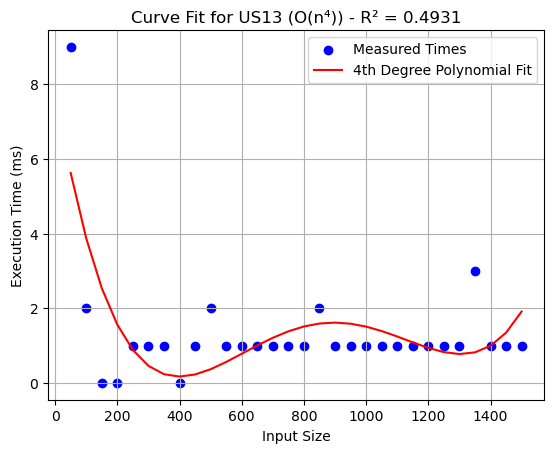

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data from a CSV file containing execution times for US13
df = pd.read_csv("../../java/pt/ipp/isep/dei/USoutOfProgram/us029/results/us13_times.csv")
x = df['size'].values  # Input sizes
y = df['time'].values   # Measured execution times in milliseconds

# Define a 4th-degree polynomial model to fit the data
def poly4_model(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# Use curve fitting to find the best polynomial coefficients
params, _ = curve_fit(poly4_model, x, y)
a, b, c, d, e = params

# Calculate the fitted values using the polynomial model
fitted_y = poly4_model(x, a, b, c, d, e)

# Compute the coefficient of determination (R²) to assess goodness-of-fit
ss_res = np.sum((y - fitted_y)**2)  # Residual sum of squares
ss_tot = np.sum((y - np.mean(y))**2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)

# Plot the original measured data points
plt.scatter(x, y, label='Measured Times', color='blue')

# Plot the fitted polynomial curve
plt.plot(x, fitted_y, label='4th Degree Polynomial Fit', color='red')

# Label the axes and the plot title, including the R² value
plt.xlabel('Input Size')
plt.ylabel('Execution Time (ms)')
plt.title(f'Curve Fit for US13 (O(n⁴)) - R² = {r_squared:.4f}')

# Show legend, grid, and display the plot
plt.legend()
plt.grid(True)
plt.show()


![Execution time graph for US13](../../pythonUS29/us29_execucaoUS13.png)

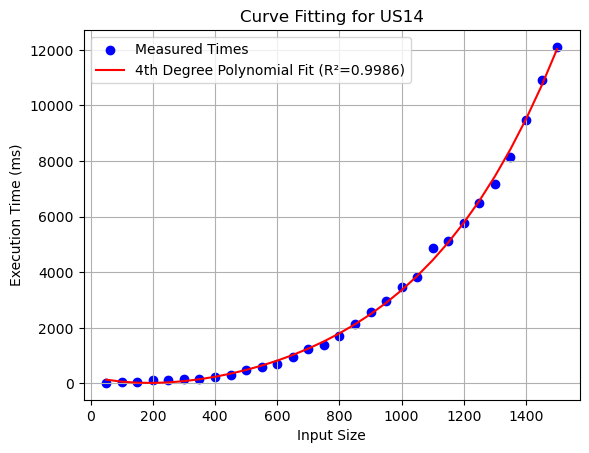

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the execution time data for US14 from CSV
df = pd.read_csv("../../java/pt/ipp/isep/dei/USoutOfProgram/us029/results/us14_times.csv")
x = df['size'].values  # Input sizes
y = df['time'].values   # Measured execution times in milliseconds

# Define a 4th-degree polynomial model
def poly4_model(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# Fit the polynomial model to the data
params, _ = curve_fit(poly4_model, x, y)
a, b, c, d, e = params

# Calculate fitted values based on the model
fitted_y = poly4_model(x, a, b, c, d, e)

# Calculate the coefficient of determination (R²) to evaluate goodness-of-fit
ss_res = np.sum((y - fitted_y) ** 2)          # Residual sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)        # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)

# Plot measured data points
plt.scatter(x, y, label='Measured Times', color='blue')

# Plot the fitted 4th-degree polynomial curve with R² in the legend
plt.plot(x, fitted_y, label=f'4th Degree Polynomial Fit (R²={r_squared:.4f})', color='red')

# Add labels and title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time (ms)')
plt.title('Curve Fitting for US14')

# Show legend, grid, and the plot
plt.legend()
plt.grid(True)
plt.show()


![Execution time graph for US14](../../pythonUS29/us29_execucaoUS14.png)

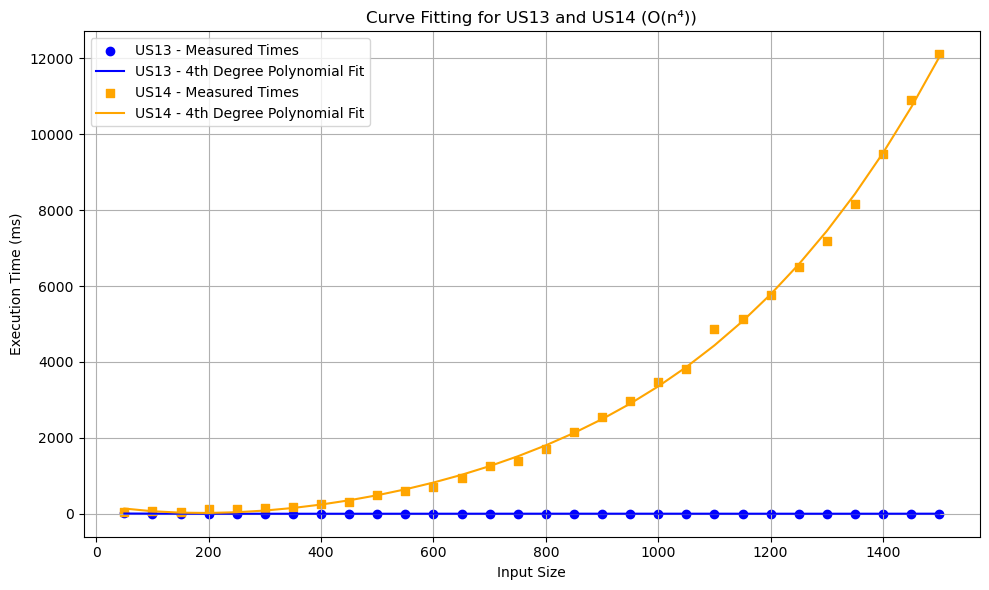

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load execution time data for US13 and US14 from CSV files
df13 = pd.read_csv("../../java/pt/ipp/isep/dei/USoutOfProgram/us029/results/us13_times.csv")
df14 = pd.read_csv("../../java/pt/ipp/isep/dei/USoutOfProgram/us029/results/us14_times.csv")

# Extract input sizes and execution times
x13 = df13['size'].values
y13 = df13['time'].values

x14 = df14['size'].values
y14 = df14['time'].values

# Define the 4th-degree polynomial model function
def poly4_model(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# Fit the polynomial model to both datasets
params13, _ = curve_fit(poly4_model, x13, y13)
params14, _ = curve_fit(poly4_model, x14, y14)

# Calculate fitted values for both datasets using the fitted parameters
fit13 = poly4_model(x13, *params13)
fit14 = poly4_model(x14, *params14)

# Create a figure and plot measured data and fitted curves for both US13 and US14
plt.figure(figsize=(10, 6))

plt.scatter(x13, y13, label='US13 - Measured Times', color='blue', marker='o')
plt.plot(x13, fit13, label='US13 - 4th Degree Polynomial Fit', color='blue')

plt.scatter(x14, y14, label='US14 - Measured Times', color='orange', marker='s')
plt.plot(x14, fit14, label='US14 - 4th Degree Polynomial Fit', color='orange')

# Add axis labels and plot title
plt.xlabel('Input Size')
plt.ylabel('Execution Time (ms)')
plt.title('Curve Fitting for US13 and US14 (O(n⁴))')

# Display legend and grid, adjust layout
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


![Execution time graph for US13 and US14](../../pythonUS29/us29_execucao.png)

---

# US031 - DOCUMENTATION



# US031

As a Data Analyst, I want to analyze the relationship between cargo types and station revenues, so that I can identify which cargo types are most impactful and make revenue predictions with potential cargo increases. To achieve this, I will calculate the correlation between each cargo type and revenue, build a linear regression model for the most correlated cargo, and generate revenue predictions for January of the following year assuming a 10% increase in the relevant cargo type.

## Objective
This user story aims to analyze the influence of different cargo types on station revenues and create a predictive model. To achieve this, the analysis involves:
- Computing the Pearson correlation coefficient between each cargo type and revenue to identify the most impactful cargo.
- Building a linear regression model using this cargo type to predict revenue.
- Generating a revenue prediction for January of the following year by assuming a 10% increase in that cargo type.
- Visualizing the relationship and residuals using scatterplots and residual plots.

## Theoretical Concepts

### Pearson Correlation Coefficient
The **Pearson correlation coefficient** ($r$) measures the strength and direction of the linear relationship between two continuous variables:
- $r = 1$ indicates a perfect positive linear relationship.
- $r = -1$ indicates a perfect negative linear relationship.
- $r = 0$ indicates no linear relationship.

The formula is:

$$
r = \frac{\sum_{i=1}^{n} (X_i - \bar{X}) (Y_i - \bar{Y})}
         {\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2} \sqrt{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}}
$$

where:
- $X$ is the cargo quantity.
- $Y$ is the revenue.
- $\bar{X}$ and $\bar{Y}$ are their respective means.

### Linear Regression Model
A **linear regression model** estimates the relationship between one or more independent variables (predictors) and a dependent variable (target). In simple linear regression (one predictor), the model is:

$$
Y = \beta_0 + \beta_1 X + \varepsilon
$$

where:
- $Y$ = revenue.
- $X$ = cargo quantity.
- $\beta_0$ = intercept.
- $\beta_1$ = slope (impact of the cargo type on revenue).
- $\varepsilon$ = error term.

### Root Mean Squared Error (RMSE)
RMSE is a measure of model accuracy:

$$
RMSE = \sqrt{\frac{\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}{n}}
$$

where:
- $Y_i$ = actual revenue.
- $\hat{Y}_i$ = predicted revenue.
- $n$ = number of observations.

Lower RMSE indicates a better model fit.

### Confidence Interval for Prediction
The model can provide a **confidence interval** for a new prediction, indicating the expected range of the predicted revenue with a certain confidence level (e.g., 95%).

### Predicting with Increased Cargo
To simulate a 10% increase in cargo:

$$
X_{new} = X_{original} \times 1.10
$$

This new value is then input into the regression model to predict revenue for January of the following year.

## Obtained Results

Using the provided CSV data:
- The cargo type most correlated with revenue is identified by computing the Pearson correlation coefficient for each cargo type. For example, suppose **Steel** has the highest correlation ($r = 0.85$), indicating that revenue is strongly influenced by Steel shipments at this station.
- A linear regression model is fitted with Steel as the independent variable and station revenue as the dependent variable. The model’s $R^2$ value, regression coefficients, and RMSE are reported to assess model quality.
- For January of the next year:
  - The average quantity of Steel shipped in January of the current year is retrieved.
  - A new cargo quantity is computed by increasing it by 10%.
  - The model predicts the revenue for this increased cargo level.
  - A 95% confidence interval is generated to assess prediction uncertainty.
- Visualization:
  - A scatterplot with a regression line shows the relationship between Steel shipments and revenue.
  - A residual plot shows the distribution of residuals to evaluate model assumptions (e.g., homoscedasticity).

### Summary of Observations
- The cargo type with the highest correlation with revenue helps guide investment or resource allocation decisions.
- The predictive model allows us to estimate revenue changes based on cargo volume adjustments, which is valuable for planning.
- The scatter and residual plots provide insights into the model’s reliability and potential outliers.

## Advantages of This Approach
- Identifies key cargo types impacting revenue.
- Supports revenue prediction under different scenarios.
- Provides a statistical foundation for data-driven decision-making.
- Visualizations make it easier to communicate findings to stakeholders.


---

# US031 - IMPLEMENTATION

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot

# Load and prepare data
df = pd.read_csv('../data/Stations_Data.csv', sep=';', decimal=',')
df = df.rename(columns={'Arrivals': 'Arrival of trains'})
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

cargo_types = ['Iron', 'Coal', 'Steel', 'Vegetables', 'Cereals', 'Wool', 'Coffee', 'Cattle', 'Mail']

def correlation_strength(r):
    if r == 1: return "perfect positive"
    elif 0.8 <= r < 1: return "strong positive"
    elif 0.5 <= r < 0.8: return "moderate positive"
    elif 0.1 <= r < 0.5: return "weak positive"
    elif 0 < r < 0.1: return "negligible positive"
    elif r == 0: return "none"
    elif -0.1 < r < 0: return "negligible negative"
    elif -0.5 < r <= -0.1: return "weak negative"
    elif -0.8 < r <= -0.5: return "moderate negative"
    elif -1 < r <= -0.8: return "strong negative"
    elif r == -1: return "perfect negative"

def analyze_station_year(station, year):
    data = df[(df['Station'] == station) & (df['Year'] == year)].copy()

    if data.empty:
        print(f"No data found for station '{station}' in year {year}")
        return

    correlations = {}
    for cargo in cargo_types:
        if data[cargo].nunique() > 1:
            r, _ = stats.pearsonr(data[cargo], data['Revenues'])
            correlations[cargo] = r
        else:
            correlations[cargo] = 0

    max_cargo, r_value = max(correlations.items(), key=lambda x: abs(x[1]))
    strength = correlation_strength(r_value)
    print(f"\nAnalysis for {station} in {year}:")
    print(f"Best cargo predictor: {max_cargo} (r = {r_value:.3f}, {strength})")

    X = data[[max_cargo]]
    y = data['Revenues']
    X_sm = sm.add_constant(X)
    model = sm.OLS(y, X_sm).fit()

    print("\nRegression Summary:")
    print(model.summary())

    # Manual calculations
    x = X[max_cargo].values
    y_vals = y.values
    x_mean = np.mean(x)
    y_mean = np.mean(y_vals)
    Sxx = np.sum((x - x_mean) ** 2)
    Syy = np.sum((y_vals - y_mean) ** 2)
    Sxy = np.sum((x - x_mean) * (y_vals - y_mean))
    beta1_manual = Sxy / Sxx
    beta0_manual = y_mean - beta1_manual * x_mean
    sqe_manual = Syy - (Sxy ** 2) / Sxx

    print("\nManual Calculations:")
    print(f"Sxx = {Sxx:.3f}, Syy = {Syy:.3f}, Sxy = {Sxy:.3f}")
    print(f"β₁ = {beta1_manual:.3f}, β₀ = {beta0_manual:.3f}")
    print(f"SQE = {sqe_manual:.3f}")

    # RMSE
    predictions = model.predict(X_sm)
    rmse = np.sqrt(np.mean((y_vals - predictions) ** 2))
    print(f"\nRMSE (Root Mean Squared Error): {rmse:.3f}")

    # Assumption checks
    print("\nModel Assumption Checks:")
    shapiro = stats.shapiro(model.resid)
    print(f"- Shapiro-Wilk (Normality): p = {shapiro.pvalue:.4f} → {'OK' if shapiro.pvalue > 0.05 else 'Violation'}")

    bp_test = het_breuschpagan(model.resid, model.model.exog)
    print(f"- Breusch-Pagan (Homoscedasticity): p = {bp_test[1]:.4f} → {'OK' if bp_test[1] > 0.05 else 'Violation'}")

    dw = sm.stats.stattools.durbin_watson(model.resid)
    print(f"- Durbin-Watson (Autocorrelation): DW = {dw:.3f} → {'OK' if 1.5 <= dw <= 2.5 else 'Potential issue'}")

    # January prediction
    jan_data = data[data['Month'] == 1]
    if not jan_data.empty and not pd.isna(jan_data[max_cargo].values[0]):
        jan_x = jan_data[max_cargo].values[0]
        x_pred = jan_x * 1.10
        pred_input = pd.DataFrame([[1.0, x_pred]], columns=model.model.exog_names)
        pred_res = model.get_prediction(pred_input)
        pred_summary = pred_res.summary_frame(alpha=0.05)

        print(f"\nPrediction for January {year+1} (10% increase in {max_cargo}):")
        print(f"- Point estimate: {pred_summary['mean'].values[0]:.2f} million €")
        print(f"- 95% CI (mean): [{pred_summary['mean_ci_lower'].values[0]:.2f}, {pred_summary['mean_ci_upper'].values[0]:.2f}]")
        print(f"- 95% Prediction Interval: [{pred_summary['obs_ci_lower'].values[0]:.2f}, {pred_summary['obs_ci_upper'].values[0]:.2f}]")
        print("\nNote: The confidence interval estimates the average revenue, while the prediction interval estimates a single future value.")
    else:
        print("\nNo valid January data for prediction.")

    # Plots
    plt.figure(figsize=(12, 6))

    # Regression plot
    plt.subplot(1, 2, 1)
    sns.regplot(x=max_cargo, y='Revenues', data=data)
    plt.title(f'{max_cargo} vs Revenue\nr = {r_value:.3f}')
    plt.xlabel(f'{max_cargo} (tons)')
    plt.ylabel('Revenue (million €)')

    # Residual plot
    plt.subplot(1, 2, 2)
    sns.residplot(x=predictions, y=model.resid, lowess=True)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted')
    plt.xlabel('Predicted Revenue')
    plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

def main():
    print("Cargo Revenue Analysis Tool")
    print("Available stations:", ', '.join(df['Station'].unique()))
    print("Available years:", sorted(df['Year'].unique()))

    station = input("Enter station name: ")
    year = input("Enter year: ")

    try:
        year = int(year)
        if station not in df['Station'].values:
            print("Invalid station.")
        else:
            analyze_station_year(station, year)
    except ValueError:
        print("Invalid year input.")

if __name__ == "__main__":
    main()


Cargo Revenue Analysis Tool
Available stations: Stuttgart, Frankfurt, Hannover, Hamburg, Berlin
Available years: [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Invalid year input.
